# Set up the environment


In [138]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from gym.wrappers import RecordVideo
from IPython.display import HTML

In [139]:
env = gym.make('CartPole-v1')

In [140]:
n_bins = 20
bins = [
    np.linspace(-4.8, 4.8, n_bins),  # Cart position
    np.linspace(-3.0, 3.0, n_bins),    # Cart velocity
    np.linspace(-0.418, 0.418, n_bins), # Pole angle
    np.linspace(-3.0, 3.0, n_bins)     # Pole velocity
]

In [153]:
def discretize_state(state, bins):
    discretized = []
    for i, value in enumerate(state):
        # Clip the value to ensure it falls within the valid range
        discretized_value = np.digitize(value, bins[i]) - 1
        discretized_value = max(0, min(discretized_value, len(bins[i]) - 2))  # Ensure it's within [0, n_bins - 1]
        discretized.append(discretized_value)
    return tuple(discretized)

Define Q-learning agent

In [154]:
class QLearningAgent:
    def __init__(self, n_actions, n_states, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.n_actions = n_actions
        self.n_states = n_states
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_table = np.zeros(n_states + (n_actions,))  # Q-table with shape (n_bins, n_bins, n_bins, n_bins, n_actions)
    
    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return env.action_space.sample()  # Explore: random action
        return np.argmax(self.q_table[state])  # Exploit: best action from Q-table

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error=td_target-self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

## Task 1 

In [155]:
n_actions = env.action_space.n  # Number of possible actions in CartPole
n_states = tuple([len(bin_edges) - 1 for bin_edges in bins])  # Discretized state space

state = env.reset()
state = state[0]  # Extract the state array from the tuple (newer versions of gym return a tuple)
discretized_state = discretize_state(state, bins)
agent = QLearningAgent(n_actions, n_states)
action = agent.choose_action(discretized_state)

print("Sampled State:", state)
print("Discretized State:", discretized_state)
print("Chosen Action:", action)

Sampled State: [ 0.04192667  0.01732011 -0.00263529 -0.04750868]
Discretized State: (9, 9, 9, 9)
Chosen Action: 1


## Task2

In [159]:
# Number of episodes
episodes = 100
rewards = []

# Run the Q-learning algorithm for 100 episodes
for episode in range(episodes):
    state = env.reset()
    state = state[0]  # Extract the state array from the tuple
    discretized_state = discretize_state(state, bins)
    total_reward = 0
    done = False

    while not done:
        action = agent.choose_action(discretized_state)
        next_state, reward, done, _, _ = env.step(action)
        
        # Ensure the state is a numpy array and not a scalar
        next_state = next_state[0] if isinstance(next_state, tuple) else next_state
        
        next_discretized_state = discretize_state(next_state, bins)
        agent.update_q_table(discretized_state, action, reward, next_discretized_state)
        discretized_state = next_discretized_state
        total_reward += reward

    rewards.append(total_reward)
    print(f"Episode: {episode + 1}, Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")



Episode: 1, Reward: 28.0, Epsilon: 0.01
Episode: 2, Reward: 18.0, Epsilon: 0.01
Episode: 3, Reward: 10.0, Epsilon: 0.01
Episode: 4, Reward: 13.0, Epsilon: 0.01
Episode: 5, Reward: 10.0, Epsilon: 0.01
Episode: 6, Reward: 54.0, Epsilon: 0.01
Episode: 7, Reward: 34.0, Epsilon: 0.01
Episode: 8, Reward: 33.0, Epsilon: 0.01
Episode: 9, Reward: 31.0, Epsilon: 0.01
Episode: 10, Reward: 17.0, Epsilon: 0.01
Episode: 11, Reward: 39.0, Epsilon: 0.01
Episode: 12, Reward: 34.0, Epsilon: 0.01
Episode: 13, Reward: 15.0, Epsilon: 0.01
Episode: 14, Reward: 68.0, Epsilon: 0.01
Episode: 15, Reward: 42.0, Epsilon: 0.01
Episode: 16, Reward: 11.0, Epsilon: 0.01
Episode: 17, Reward: 45.0, Epsilon: 0.01
Episode: 18, Reward: 16.0, Epsilon: 0.01
Episode: 19, Reward: 24.0, Epsilon: 0.01
Episode: 20, Reward: 31.0, Epsilon: 0.01
Episode: 21, Reward: 55.0, Epsilon: 0.01
Episode: 22, Reward: 24.0, Epsilon: 0.01
Episode: 23, Reward: 35.0, Epsilon: 0.01
Episode: 24, Reward: 38.0, Epsilon: 0.01
Episode: 25, Reward: 42.0

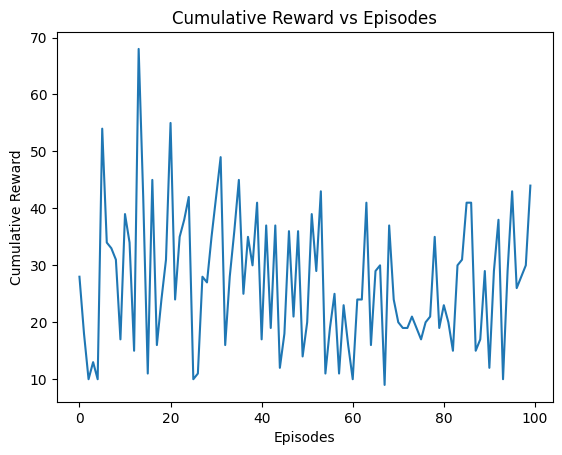

In [160]:
# Plot the cumulative reward over episodes
plt.plot(range(episodes), rewards)
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Episodes')
plt.show()


In [161]:

# Calculate and print the average reward
average_reward = np.mean(rewards)
print(f"Average Reward over {episodes} episodes: {average_reward}")

Average Reward over 100 episodes: 27.13
